In [34]:
pip install formulaic

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from gapminder import gapminder

from sklearn.model_selection import train_test_split
from formulaic import Formula
from sklearn import linear_model 
from sklearn.preprocessing import PolynomialFeatures    # Herramientas de polinomios
from formulaic import model_matrix
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño
from sklearn.preprocessing import PolynomialFeatures    # Herramientas de polinomios


# Ej 1

## a)  Ejecutar el siguiente codigo y observar si hay filas con datos faltantes (NaN)

In [36]:
penguins = sns.load_dataset("penguins")

In [37]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Si hay, ya podemos ver un NaN en 3.

In [38]:
penguins.isnull().values.any()
penguins2 = penguins

In [39]:
penguins = penguins.dropna()
display(penguins)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [40]:
penguins.shape

(333, 7)

In [41]:
# Consigo el 20%
test = penguins.shape[0] * 20 / 100 

# lo redondeo
test = int(test)
print(test)

# recordar sumar 1 al train, asi no desaprovecho una fila.

66


## b) Dividir el dataset resultante en un grupo de entrenamiento y testeo (80% - 20%)

### A -> Utilizando un array de Numpy para filtrar

In [42]:
# creo array del mismo tamaño que el database, todos con valor False
train_ind = np.full(penguins.shape[0], False) 

# Cambio los 1ros 80% a True
train_ind[0:penguins.shape[0] - test] = True

np.random.shuffle(train_ind) # Lo guarda el mismo vector

# Selecciono de penguins los que su indice coinciden con que train_ind == True, garantizandome una eleccion al azar de train
penguins_train2 = penguins[train_ind == True]

# Lo mismo pero con False para los de test%
penguins_test2 = penguins[train_ind == False]

In [43]:
display(train_ind)

array([ True,  True, False,  True,  True, False, False,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False, False,  True, False,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True, False,

### B -> train_test_split de sklearn

In [44]:
from sklearn.model_selection import train_test_split
penguins_train, penguins_test = train_test_split(penguins, test_size = 0.2, random_state = 42)

In [45]:
display(penguins_test)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
30,Adelie,Dream,39.5,16.7,178.0,3250.0,Female
317,Gentoo,Biscoe,46.9,14.6,222.0,4875.0,Female
79,Adelie,Torgersen,42.1,19.1,195.0,4000.0,Male
201,Chinstrap,Dream,49.8,17.3,198.0,3675.0,Female
63,Adelie,Biscoe,41.1,18.2,192.0,4050.0,Male
...,...,...,...,...,...,...,...
288,Gentoo,Biscoe,43.5,14.2,220.0,4700.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
83,Adelie,Torgersen,35.1,19.4,193.0,4200.0,Male
319,Gentoo,Biscoe,51.1,16.5,225.0,5250.0,Male


In [46]:
display(penguins_train)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
230,Gentoo,Biscoe,40.9,13.7,214.0,4650.0,Female
84,Adelie,Dream,37.3,17.8,191.0,3350.0,Female
303,Gentoo,Biscoe,50.0,15.9,224.0,5350.0,Male
22,Adelie,Biscoe,35.9,19.2,189.0,3800.0,Female
29,Adelie,Biscoe,40.5,18.9,180.0,3950.0,Male
...,...,...,...,...,...,...,...
194,Chinstrap,Dream,50.9,19.1,196.0,3550.0,Male
77,Adelie,Torgersen,37.2,19.4,184.0,3900.0,Male
112,Adelie,Biscoe,39.7,17.7,193.0,3200.0,Female
277,Gentoo,Biscoe,45.5,15.0,220.0,5000.0,Male


In [47]:
from sklearn.model_selection import train_test_split

# Quito la columna "species" para obtener las caracteristicas 
x = penguins.drop("species", axis = 1)

# Utilizo la columna "species" como nuestra variable objetivo
y = penguins["species"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## c)

Crear y ajustar 3 modelos utilizando polinomios de grados 1, 2 y 3

### 1.  Modelo grado 3


Vamos a empezar creando un modelo que relacione el body mass con el flipper length que sea polinomio de grado 3

In [48]:
# Creamos el modelo usando Formula, notar "poly(ecuacion, 3)" 3 es el grado del polinomio
y, x = Formula(" body_mass_g  ~ poly(flipper_length_mm,3)").get_model_matrix(penguins)

# No vamos a usar new_peng, pero esto lo usamos para visualizar mejor las cosas
new_peng = pd.concat([y, x], axis = 1)
new_peng.head()

,body_mass_g,Intercept,"poly(flipper_length_mm, 3)[1]","poly(flipper_length_mm, 3)[2]","poly(flipper_length_mm, 3)[3]"
0,3750.0,1.0,-0.078186,0.089042,-0.053092
1,3800.0,1.0,-0.058607,0.030342,0.016707
2,3250.0,1.0,-0.023365,-0.038292,0.036284
4,3450.0,1.0,-0.031197,-0.027154,0.040744
5,3650.0,1.0,-0.042944,-0.006039,0.039056


In [49]:
# Definimos una division del 20% para test y 80% para el train.
from sklearn.metrics import r2_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [50]:
# Creamos el entorno de la Regresion Lineal
modelo_3 = linear_model.LinearRegression(fit_intercept = False)

# Entrenamos x e y
modelo_3.fit(x_train, y_train)

# Obtenemos (de curiosidad) los beta_0 ... beta_3
modelo_3.coef_

array([[ 4212.46960438, 12930.77787978,  1982.42935402, -1107.45554233]])

In [51]:
# Calculamos los nuevos "y"s usando el polinomio de grado 3
y_pred = modelo_3.predict(x_test)

# Calculamos el R^2, es decir comparamos el y_test con el que acabamos de predecir 
r2_3 = r2_score(y_test, y_pred)
print('R^2: ', r2_3)

# Calculando el ECM
ecm_3 = mean_squared_error(y_test, y_pred)
print('Raiz cuadrada del ECM test: ', np.sqrt(ecm_3), "\n")

# Predicciones en el conjunto de entrenamiento
y_train_pred = modelo_3.predict(x_train)

r2_3_train = r2_score(y_train, y_train_pred)
print('R^2 train: ', r2_3_train)

ecm_3_train = mean_squared_error(y_train, y_train_pred)

print('Raiz cuadrada del ECM train: ', np.sqrt(ecm_3_train))

R^2:  0.8036887712499918
Raiz cuadrada del ECM test:  351.65984875666675 

R^2 train:  0.7785640221262267
Raiz cuadrada del ECM train:  379.4680416801235


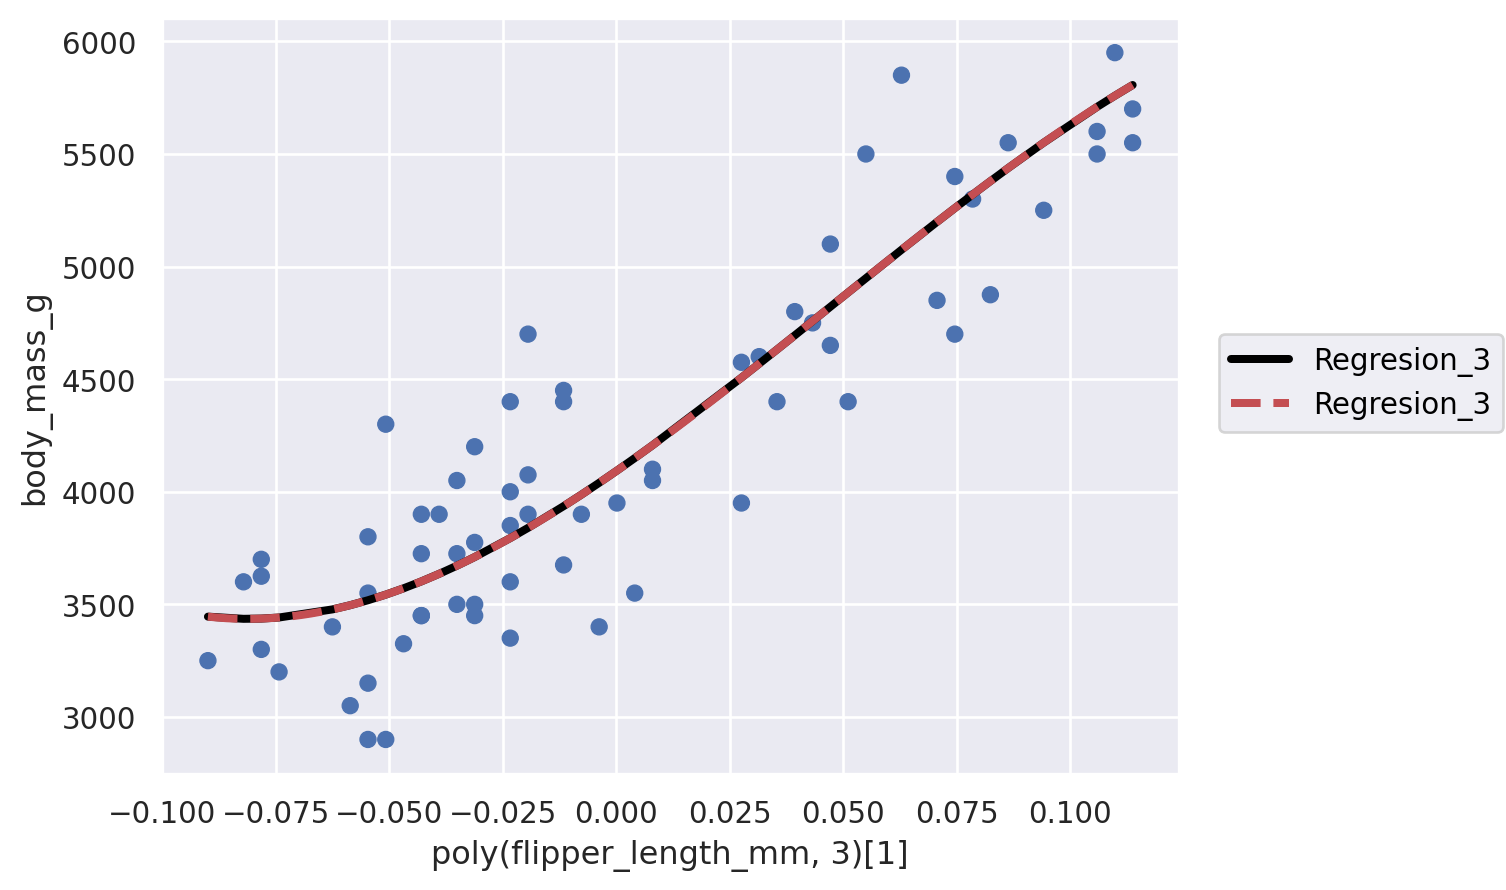

In [52]:
# Grafiquemos la comparacion entre nuestra regresion y la de PolyFit
(
    so.Plot(data=x_test, x='poly(flipper_length_mm, 3)[1]', y= y_pred.flatten())
    .add(so.Dot(), y = y_test["body_mass_g"])
    
    .add(so.Line(color='black', linewidth=3), label = "Regresion_3")
    .add(so.Line(color='r', linewidth=3, linestyle = "--"), so.PolyFit(3), label = "Regresion_3")
)

Notamos que nos devuelve exactamente la misma curva, es decir que nuestros calculos son correctos.

---

Veamos para los valores de "train"

### 2. Modelo grado 2

In [53]:
# Grado 2, cambiamos el 2do parametro de poly() por 2 -> poly(..., 2)
y, x = Formula(" body_mass_g  ~ poly(flipper_length_mm,2)").get_model_matrix(penguins)

new_peng = pd.concat([y, x], axis = 1)
new_peng.head()

,body_mass_g,Intercept,"poly(flipper_length_mm, 2)[1]","poly(flipper_length_mm, 2)[2]"
0,3750.0,1.0,-0.078186,0.089042
1,3800.0,1.0,-0.058607,0.030342
2,3250.0,1.0,-0.023365,-0.038292
4,3450.0,1.0,-0.031197,-0.027154
5,3650.0,1.0,-0.042944,-0.006039


In [54]:
# Definimos una division del 20% para test y 80% para el train.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [55]:
# Creamos el entorno de la Regresion Lineal
modelo_2 = linear_model.LinearRegression(fit_intercept = False)

# Entrenamos x e y
modelo_2.fit(x_train, y_train)

# Obtenemos (de curiosidad) los beta_0 ... beta_2
modelo_2.coef_

array([[ 4214.93352539, 12972.846039  ,  2042.85567694]])

In [56]:
# Calculamos los nuevos "y"s usando el polinomio de grado 2
y_pred = modelo_2.predict(x_test)

# Calculamos el R^2, es decir comparamos el y_test con el que acabamos de predecir 
r2_2 = r2_score(y_test, y_pred)
print('R^2: ', r2_2)

# Calculando el ECM
ecm_2 = mean_squared_error(y_test, y_pred)
print('Raiz cuadrada del ECM test: ', np.sqrt(ecm_2), "\n")

# Predicciones en el conjunto de entrenamiento
y_train_pred = modelo_2.predict(x_train)

r2_2_train = r2_score(y_train, y_train_pred)
print('R^2 train: ', r2_2_train)

ecm_2_train = mean_squared_error(y_train, y_train_pred)

print('Raiz cuadrada del ECM train: ', np.sqrt(ecm_2_train))

R^2:  0.7972332916610816
Raiz cuadrada del ECM test:  357.3950554690931 

R^2 train:  0.7728101612061435
Raiz cuadrada del ECM train:  384.3665322413236


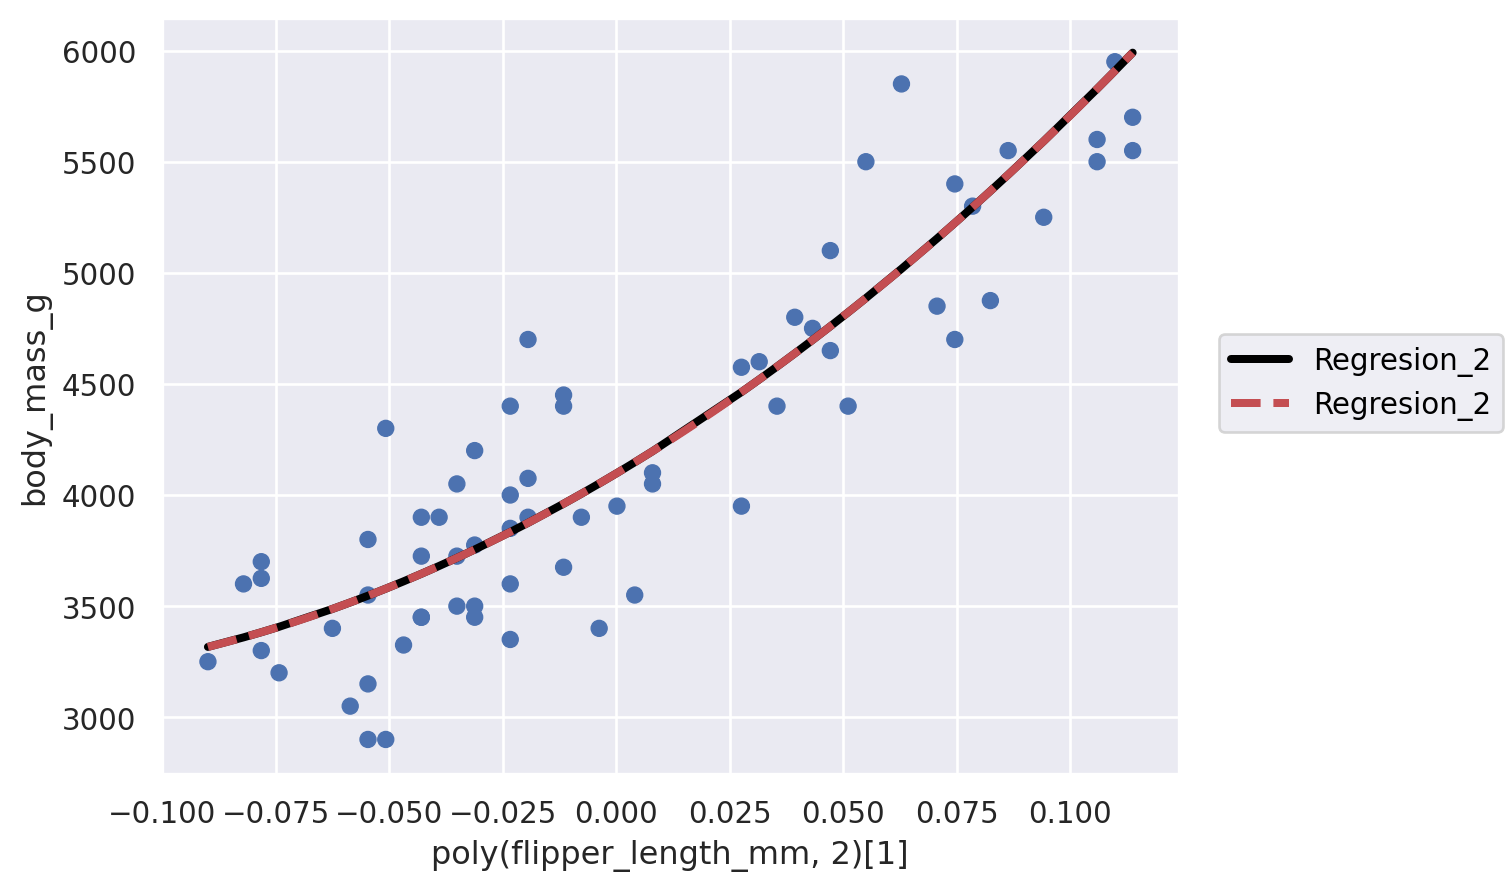

In [57]:
# Grafiquemos la comparacion entre nuestra regresion y la de PolyFit
(
    so.Plot(data=x_test, x='poly(flipper_length_mm, 2)[1]', y= y_pred.flatten())
    .add(so.Dot(), y = y_test["body_mass_g"])
    
    .add(so.Line(color='black', linewidth=3), label = "Regresion_2")
    .add(so.Line(color='r', linewidth=3, linestyle = "--"), so.PolyFit(2), label = "Regresion_2")
)

### 3. Modelo grado 1

Y lo mismo haremos con el ultimo modelo

In [58]:
# Grado 1, cambiamos el 2do parametro de poly() por 1 -> poly(..., 1)
y, x = Formula(" body_mass_g  ~ poly(flipper_length_mm,1)").get_model_matrix(penguins)

new_peng = pd.concat([y, x], axis = 1)
new_peng.head()

,body_mass_g,Intercept,"poly(flipper_length_mm, 1)[1]"
0,3750.0,1.0,-0.078186
1,3800.0,1.0,-0.058607
2,3250.0,1.0,-0.023365
4,3450.0,1.0,-0.031197
5,3650.0,1.0,-0.042944


In [59]:
# Definimos una division del 20% para test y 80% para el train.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [60]:
# Creamos el entorno de la Regresion Lineal
modelo_1 = linear_model.LinearRegression(fit_intercept = False)

# Entrenamos x e y
modelo_1.fit(x_train, y_train)

# Obtenemos (de curiosidad) los beta_0 , beta_1
modelo_1.coef_

array([[ 4213.09018023, 12875.71386191]])

In [61]:
# Calculamos los nuevos "y"s usando el polinomio de grado 1
y_pred = modelo_1.predict(x_test)

# Calculamos el R^2, es decir comparamos el y_test con el que acabamos de predecir 
r2_1 = r2_score(y_test, y_pred)
print('R^2: ', r2_1)

# Calculando el ECM
ecm_1 = mean_squared_error(y_test, y_pred)
print('Raiz cuadrada del ECM test: ', np.sqrt(ecm_1), "\n")

# Predicciones en el conjunto de entrenamiento
y_train_pred = modelo_1.predict(x_train)

r2_1_train = r2_score(y_train, y_train_pred)
print('R^2 train: ', r2_1_train)

ecm_1_train = mean_squared_error(y_train, y_train_pred)

print('Raiz cuadrada del ECM train: ', np.sqrt(ecm_1_train))

R^2:  0.7938115564401114
Raiz cuadrada del ECM test:  360.398001833317 

R^2 train:  0.7541483336256306
Raiz cuadrada del ECM train:  399.8413379067819


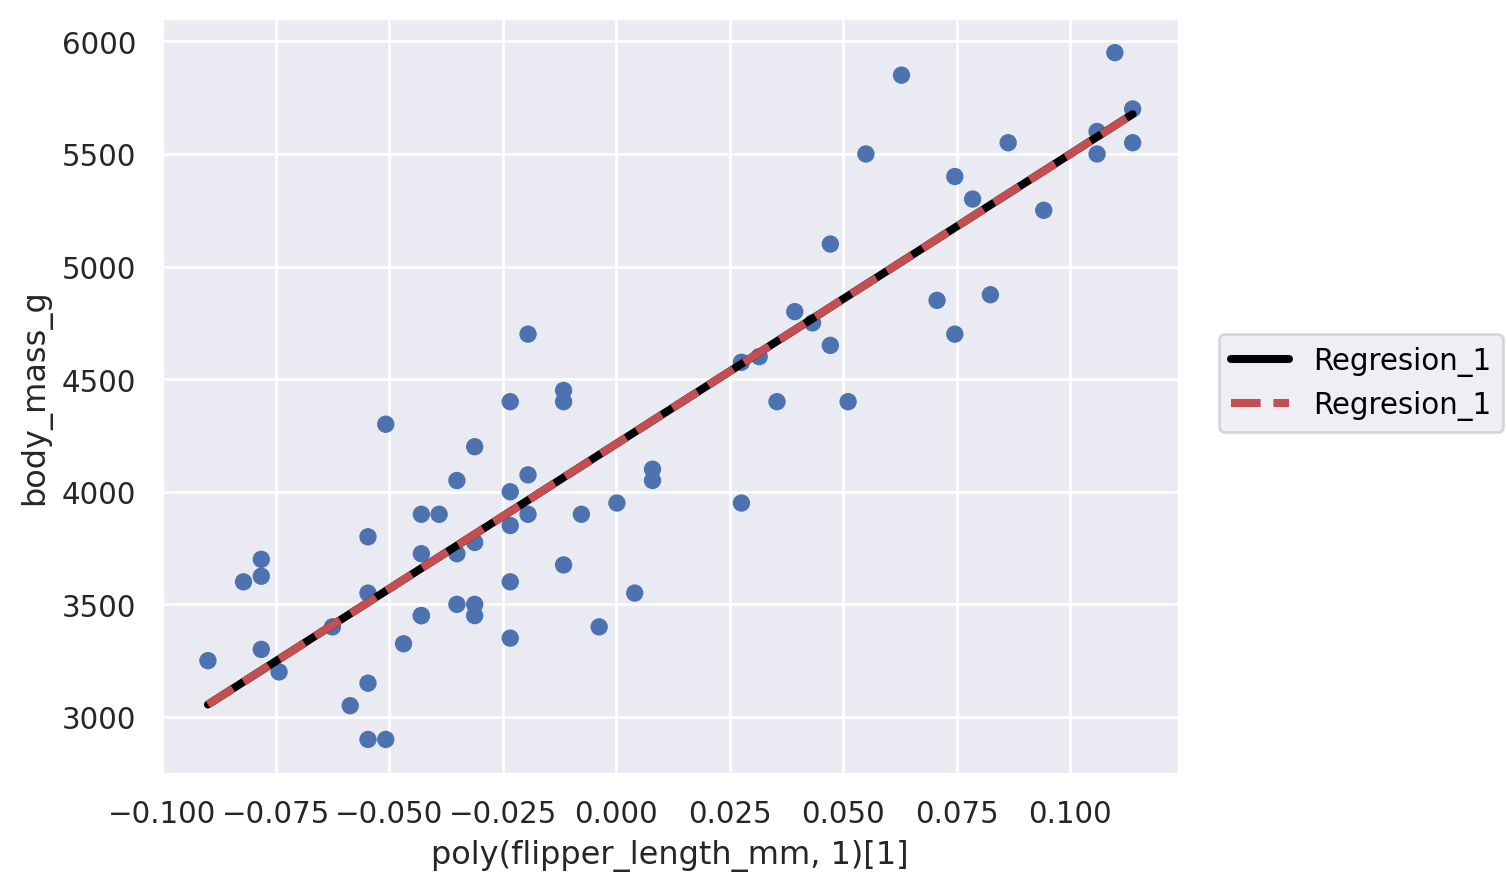

In [62]:
# Grafiquemos la comparacion entre nuestra regresion y la de PolyFit
(
    so.Plot(data=x_test, x='poly(flipper_length_mm, 1)[1]', y= y_pred.flatten())
    .add(so.Dot(), y = y_test["body_mass_g"])
    
    .add(so.Line(color='black', linewidth=3), label = "Regresion_1")
    .add(so.Line(color='r', linewidth=3, linestyle = "--"), so.PolyFit(2), label = "Regresion_1")
)

## d) Calcular para cada uno el error prediccion en el grupo de entrenamiento y en el grupo de test

Devolvamos los errores anteriormente calculados

In [63]:
print("R² modelo 1: ", r2_1)
print("ECM modelo 1: ", ecm_1, "\n")
print("R² modelo 1: ", r2_1_train)
print("ECM modelo 1: ", ecm_1_train, "\n \n")

print("R² modelo 2: ", r2_2)
print("ECM modelo 2: ", ecm_2, "\n")
print("R² modelo 1: ", r2_2_train)
print("ECM modelo 1: ", ecm_2_train, "\n \n")

print("R² modelo 3: ", r2_3)
print("ECM modelo 3: ", ecm_3, "\n")
print("R² modelo 1: ", r2_3_train)
print("ECM modelo 1: ", ecm_3_train, "\n \n")

R² modelo 1:  0.7938115564401114
ECM modelo 1:  129886.71972544755 

R² modelo 1:  0.7541483336256306
ECM modelo 1:  159873.09549908535 
 

R² modelo 2:  0.7972332916610816
ECM modelo 2:  127731.22567375615 

R² modelo 1:  0.7728101612061435
ECM modelo 1:  147737.63110722046 
 

R² modelo 3:  0.8036887712499918
ECM modelo 3:  123664.64922756172 

R² modelo 1:  0.7785640221262267
ECM modelo 1:  143995.99465654796 
 



## e) Menor error ECM en el ajuste? Y de prediccion?  

---

- Vemos que el menor error ECM en el ajuste (test) se encuentra en el modelo 3.

- Tambien vemos que el menor error ECM para la prediccion (train) tambien se encuentra en el modelo 3.
- Notamos un leve deterioro en la precision entre el "test" y el "train"

## f) ¿Cual de los 3 modelos utilizaria?

Sin dudar el modelo con el polinomio grado 3.

# Ej 2

## a) Realizar un grafico de dispersion para cada par de variables

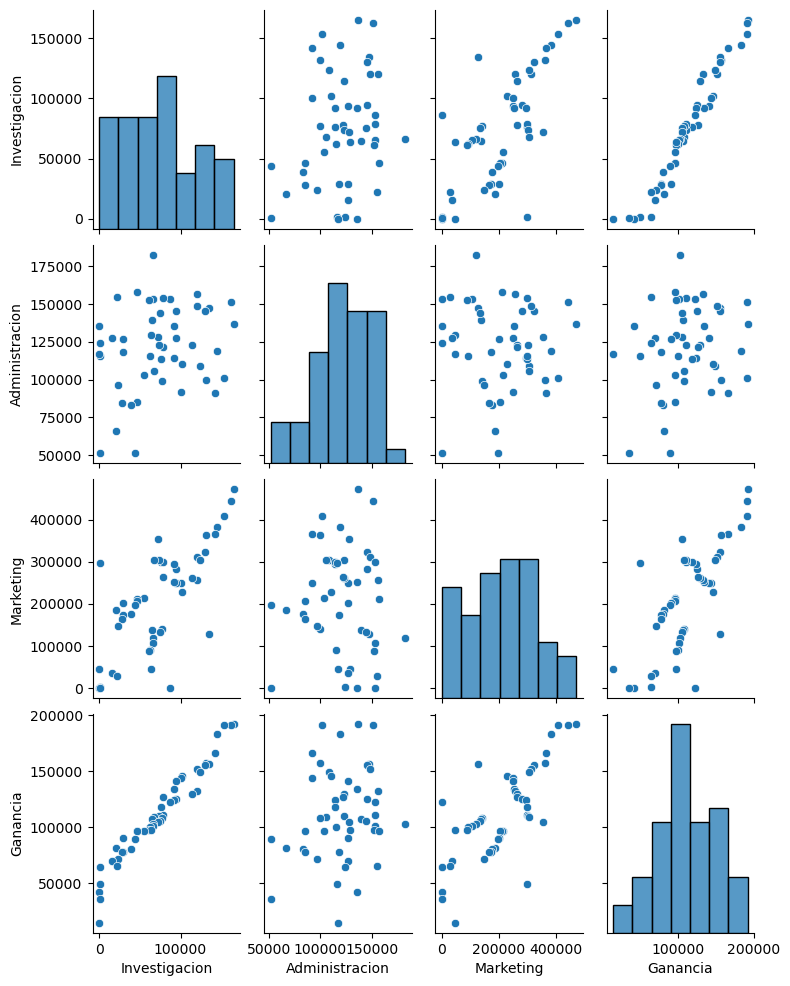

In [64]:
startups = pd.read_csv("50_Startups.csv")
sns.pairplot(
    data = startups, aspect = .8
)

Si quisieramos predecir la ganancia mediante un modelo lineal utilizando una sola variable predictora, ¿Cuál variable utilizaría?

Diseñe un experimento para verificar su respuesta

- Tan solo viendo el grafico de "Investigacion" x "Ganancia" (abajo izquierda) podriamos generar una regresion lineal para predecir futuros resultados, ya que logramos ver una similitud a una recta. 

In [65]:
startups.head()

,Investigacion,Administracion,Marketing,Estado,Ganancia
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


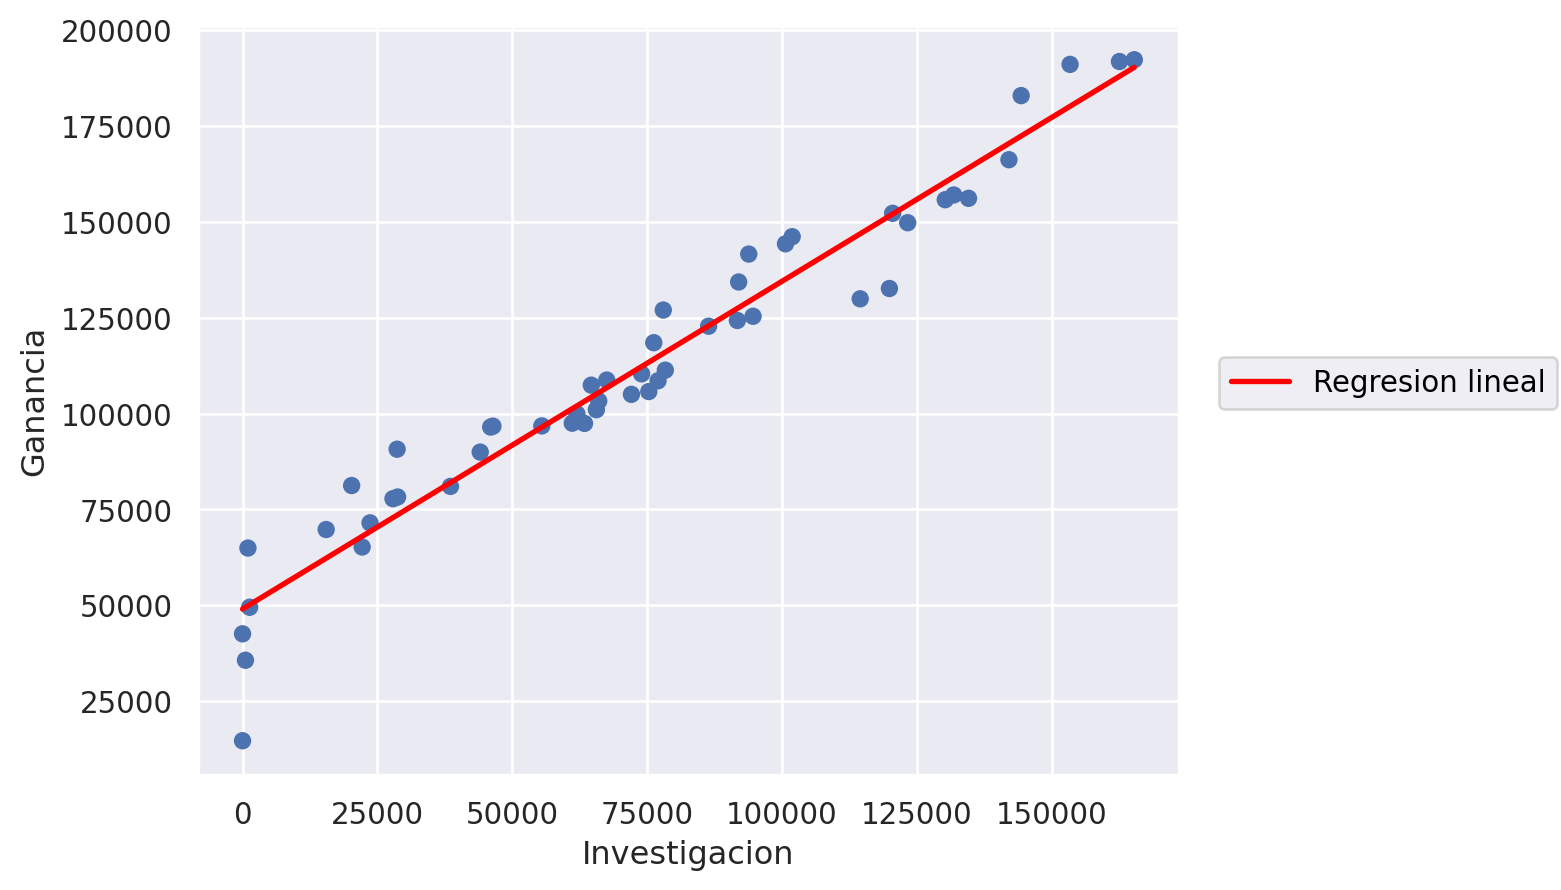

In [66]:
# Generamos la regresion lineal para "Investigacion" y "Ganancia"

(
    so.Plot(data=startups, x='Investigacion', y='Ganancia')
    .add(so.Dot())
    .add(so.Line(color='red', linewidth=2), so.PolyFit(1), label='Regresion lineal')
)

## b) ¿Considera que un modelo lineal multivariado ayudaria a predecir mejor la ganancia que el modelo lineal univariado del item anterior?

Realizar un experimento para verificar su respuesta.

En un modelo lineal multivariado estariamos obteniendo datos de multiples grafos a la vez, dandonos una mayor precision que el modelo lineal univariado utilizado en a). 

Entonces, creo que crear este modelo nos ayudará a mejorar la precisión de la ganancia en general.

In [67]:
!pip install formulaic

Defaulting to user installation because normal site-packages is not writeable


In [68]:
from formulaic import model_matrix

In [69]:
startups.head()

,Investigacion,Administracion,Marketing,Estado,Ganancia
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [70]:
df = startups

# Definimos y = Ganancia como variable objetivo
# Definimos x = "Administracion", "Marketing", "Estado", e "Investigacion" las variables predictoras.
y, x = Formula("Ganancia ~ Administracion + Marketing + Estado + Investigacion").get_model_matrix(df)
pd.concat([y, x], axis = 1)

# ~ = "Separates the target features from the input features." 
# + = "Adds a new term to the set of features." (segun bibliografia)

,Ganancia,Intercept,Administracion,Marketing,Estado[T.Florida],Estado[T.New York],Investigacion
0,192261.83,1.0,136897.80,471784.10,0,1,165349.20
1,191792.06,1.0,151377.59,443898.53,0,0,162597.70
2,191050.39,1.0,101145.55,407934.54,1,0,153441.51
3,182901.99,1.0,118671.85,383199.62,0,1,144372.41
4,166187.94,1.0,91391.77,366168.42,1,0,142107.34
5,156991.12,1.0,99814.71,362861.36,0,1,131876.90
6,156122.51,1.0,147198.87,127716.82,0,0,134615.46
7,155752.60,1.0,145530.06,323876.68,1,0,130298.13
8,152211.77,1.0,148718.95,311613.29,0,1,120542.52
9,149759.96,1.0,108679.17,304981.62,0,0,123334.88


- Generemos un Modelo con este nuevo dataframe

In [71]:
# Definimos una division del 20% para test y 80% para el train.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Creamos el entorno de la Regresion Lineal
modelo_s = linear_model.LinearRegression(fit_intercept = False)

# Entrenamos x e y
modelo_s.fit(x_train, y_train)

# Obtenemos (de curiosidad) los beta_0 ... beta_5
modelo_s.coef_

array([[ 5.40280396e+04, -6.87878823e-02,  2.98554429e-02,
         9.38793006e+02,  6.98775997e+00,  8.05630064e-01]])

In [72]:
# Calculamos los nuevos "y"s usando el polinomio de grado 5
y_pred = modelo_s.predict(x_test)

# Calculamos el R^2, es decir comparamos el y_test con el que acabamos de predecir 
r2_s = r2_score(y_test, y_pred)
print('R^2: ', r2_s)

# Calculando el ECM
ecm_s = mean_squared_error(y_test, y_pred)
print('Raiz cuadrada del ECM test: ', np.sqrt(ecm_s), "\n")

# Predicciones en el conjunto de entrenamiento
y_train_pred_s = modelo_s.predict(x_train)

r2_s_train = r2_score(y_train, y_train_pred_s)
print('R^2 train: ', r2_s_train)

ecm_s_train = mean_squared_error(y_train, y_train_pred_s)

print('Raiz cuadrada del ECM train: ', np.sqrt(ecm_s_train))

R^2:  0.8987266414385402
Raiz cuadrada del ECM test:  9055.95732320467 

R^2 train:  0.9537019995248526
Raiz cuadrada del ECM train:  8927.489013300055


In [73]:
display(y_test)

,Ganancia
13,134307.35
39,81005.76
30,99937.59
45,64926.08
17,125370.37
48,35673.41
26,105733.54
25,107404.34
32,97427.84
19,122776.86


In [74]:
display(x_test)

,Intercept,Administracion,Marketing,Estado[T.Florida],Estado[T.New York],Investigacion
13,1.0,135495.07,252664.93,0,0,91992.39
39,1.0,82982.09,174999.30,0,0,38558.51
30,1.0,115641.28,91131.24,1,0,61994.48
45,1.0,124153.04,1903.93,0,1,1000.23
17,1.0,145077.58,282574.31,0,1,94657.16
48,1.0,51743.15,0.00,0,1,542.05
26,1.0,144135.98,134050.07,1,0,75328.87
25,1.0,139553.16,137962.62,0,0,64664.71
32,1.0,129219.61,46085.25,0,0,63408.86
19,1.0,153514.11,0.00,0,1,86419.70


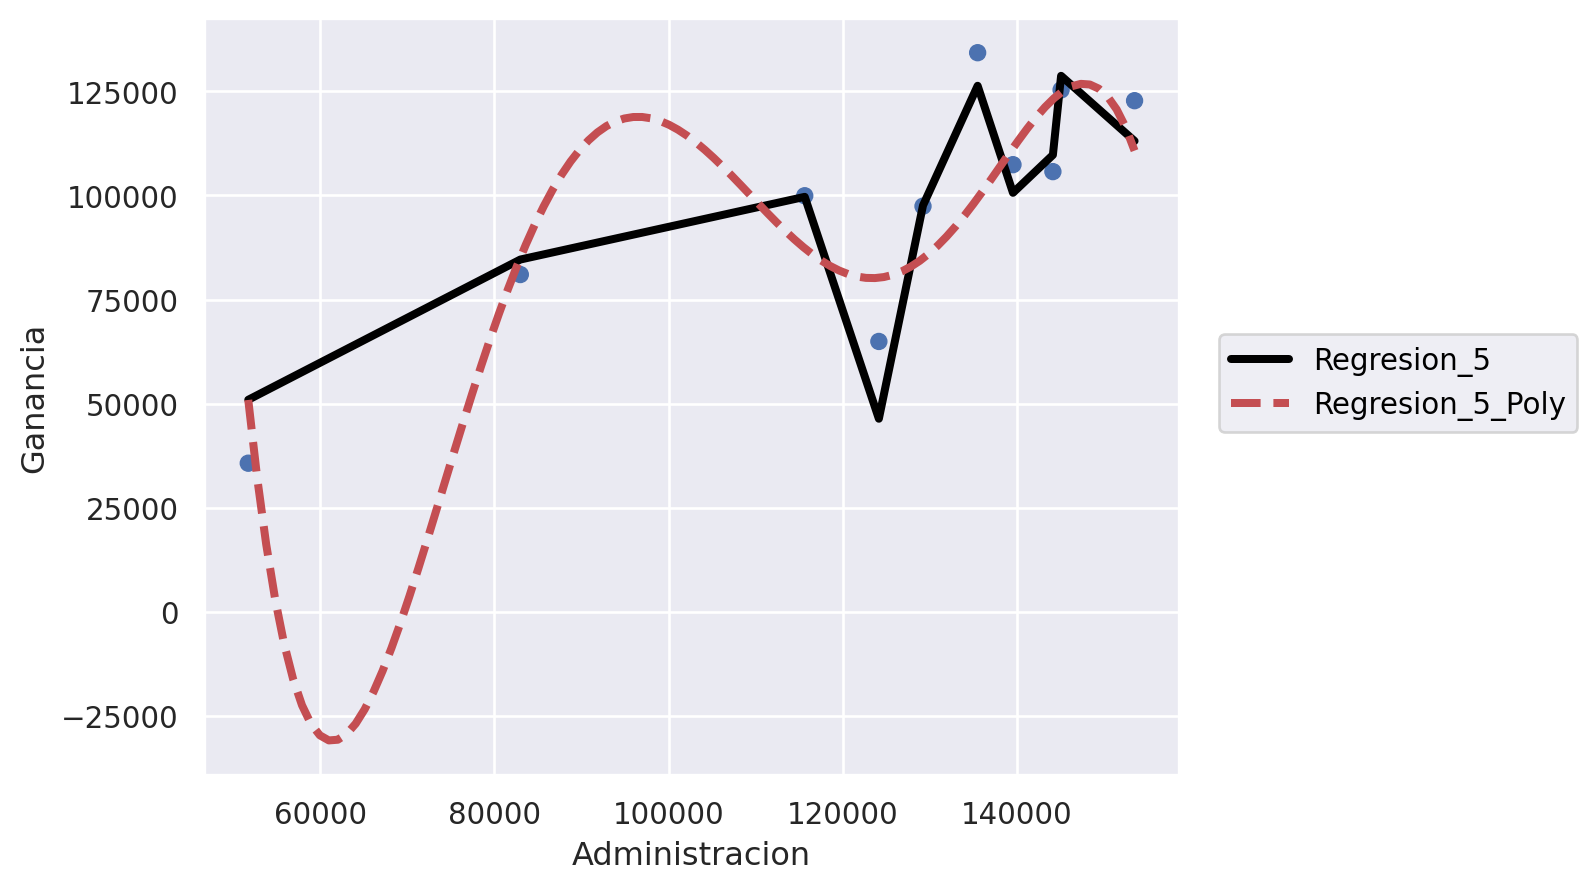

In [75]:
# Grafiquemos la comparacion entre nuestra regresion y la de PolyFit por ejemplo con x = Administracion
(
    so.Plot(data=x_test, x='Administracion', y= y_pred.flatten())
    .add(so.Dot(), y = y_test["Ganancia"])
    
    .add(so.Line(color='black', linewidth=3), label = "Regresion_5")
    .add(so.Line(color='r', linewidth=3, linestyle = "--"), so.PolyFit(5), label = "Regresion_5_Poly")
)

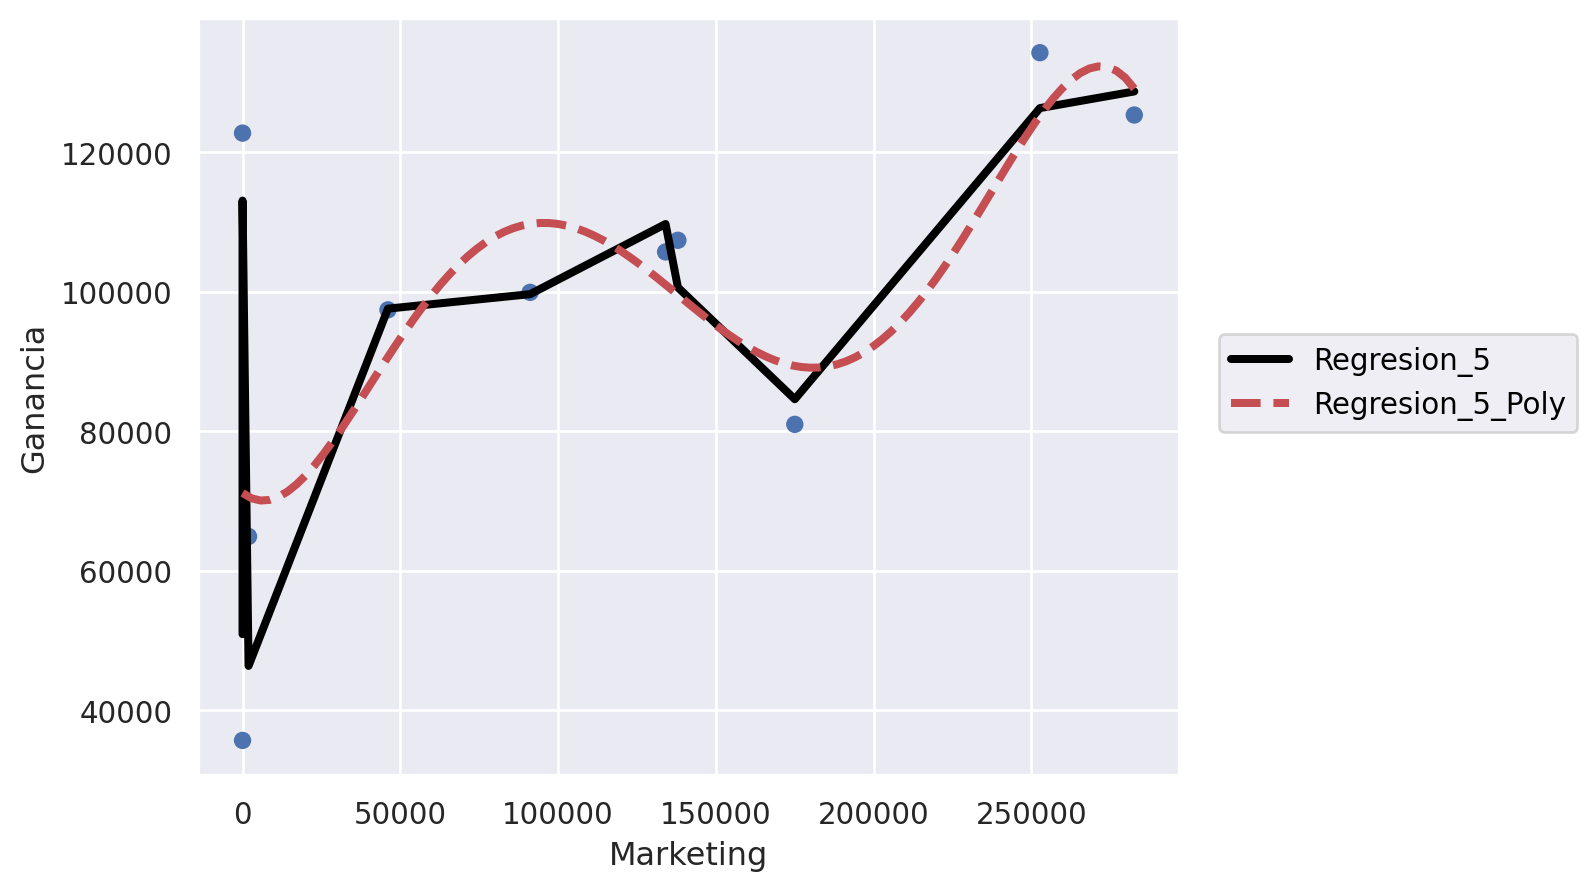

In [76]:
# Y con x = Marketing?
(
    so.Plot(data=x_test, x='Marketing', y= y_pred.flatten())
    .add(so.Dot(), y = y_test["Ganancia"])
    
    .add(so.Line(color='black', linewidth=3), label = "Regresion_5")
    .add(so.Line(color='r', linewidth=3, linestyle = "--"), so.PolyFit(5), label = "Regresion_5_Poly")
)

No se que tan bien esté mi polinomio, pero es seguro que predice mejor que un modelo lineal univariado.

# Ej 3

Se quiere predecir el peso de un pingüino (body_mass_g) usando como variables predictoras el largo de la aleta (flipper_length_mm) y el sexo del pingüino.

In [77]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


## a) ¿Cuales son los valores que toma "sex"?

¿Tipo de variable?

- "sex" toma valores "Female" o "Male".

- "sex" es una variable categórica. Los valores que tomará cuando usemos formulaic para obtener un dataset mas especializado en nuestor problema, seran valores binarios (1 si es male, 0 si es female o viceversa).

- No, pero se transformará en una luego de nuestra fórmula.

## b) Escribir la ecuacion de modelo lineal para este caso.

¿Qué unidades tienen las variables y como se codifica la variable "sexo del pinguino"?

- Las variables son numéricas.
- sex --> 1 si es male, 0 si es female.

In [127]:
# Definimos de esta forma nuestra fórmula
y, x = model_matrix(" body_mass_g ~ flipper_length_mm + sex", penguins)
pd.concat([y, x], axis = 1)

,body_mass_g,Intercept,flipper_length_mm,sex[T.Male]
0,3750.0,1.0,181.0,1
1,3800.0,1.0,186.0,0
2,3250.0,1.0,195.0,0
4,3450.0,1.0,193.0,0
5,3650.0,1.0,190.0,1
...,...,...,...,...
338,4925.0,1.0,214.0,0
340,4850.0,1.0,215.0,0
341,5750.0,1.0,222.0,1
342,5200.0,1.0,212.0,0


## c) Codificacion de variables binarias.

In [128]:
# from sklearn.preprocessing import OrdinalEncoder
# encoder = OrdinalEncoder()
# sexM = encoder.fit_transform(penguins[["sex"]])
# penguins["sexM"] = sexM
# display(penguins)

# Re piola pero no lo voy a usar xq ya el otro me da "sex" en forma numerica

## d) Ajustar el modelo usando todos los datos disponibles

In [129]:
# Definimos una division del 20% para test y 80% para el train.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [130]:
# Creamos el entorno de la Regresion Lineal
modelo_p = linear_model.LinearRegression(fit_intercept = False)

# Entrenamos x e y
modelo_p.fit(x_train, y_train)

# Obtenemos (de curiosidad) los beta_0 ... beta_3
modelo_p.coef_

array([[-5481.82197112,    47.36694421,   338.90293776]])

In [131]:
# Calculamos los nuevos "y"s usando el polinomio de grado 3
y_pred = modelo_p.predict(x_test)

# Calculamos el R^2, es decir comparamos el y_test con el que acabamos de predecir 
r2_p = r2_score(y_test, y_pred)
print('R^2: ', r2_p)

# Calculando el ECM
ecm_p = mean_squared_error(y_test, y_pred)
print('Raiz cuadrada del ECM test: ', np.sqrt(ecm_p), "\n")

# Predicciones en el conjunto de entrenamiento
y_train_pred = modelo_p.predict(x_train)

r2_p_train = r2_score(y_train, y_train_pred)
print('R^2 train: ', r2_p_train)

ecm_p_train = mean_squared_error(y_train, y_train_pred)

print('Raiz cuadrada del ECM train: ', np.sqrt(ecm_p_train))

R^2:  0.847622126289028
Raiz cuadrada del ECM test:  309.8212264812092 

R^2 train:  0.7954800691773981
Raiz cuadrada del ECM train:  364.68586648313766


---
Valores en el Ej 1:

R^2:  0.8036887712499918

Raiz cuadrada del ECM test:  351.65984875666675 


R^2 train:  0.7785640221262267

Raiz cuadrada del ECM train:  379.4680416801235


---


- Vemos entonces que mejoró mucho 

## e) <mark>ERROR AL GRAFICAR</mark>  Realizar una visualización apropiada para ver los datos junto con las predicciones del modelo.

In [132]:
x_test["predicciones"] = y_pred
x_test.tail()

,Intercept,flipper_length_mm,sex[T.Male],predicciones
288,1.0,220.0,0,4938.905754
4,1.0,193.0,0,3659.998261
83,1.0,193.0,1,3998.901198
319,1.0,225.0,1,5514.643413
66,1.0,195.0,0,3754.732149


In [133]:
print(y_pred)

[[2949.49409751]
 [5033.63964256]
 [4093.63508677]
 [3896.83298163]
 [3951.53425415]
 [4559.97020051]
 [5419.90952453]
 [4093.63508677]
 [3998.90119836]
 [4377.83675201]
 [4141.00203098]
 [4235.73591939]
 [4370.50242368]
 [3659.9982606 ]
 [4465.2363121 ]
 [3281.06270695]
 [3375.79659536]
 [3612.63131639]
 [3375.79659536]
 [4654.70408892]
 [4141.00203098]
 [3856.80036574]
 [5656.74424556]
 [4472.57064042]
 [3091.59493013]
 [3423.16353957]
 [4607.33714471]
 [4607.33714471]
 [3091.59493013]
 [5704.11118977]
 [3375.79659536]
 [5751.47813397]
 [4235.73591939]
 [4086.30075845]
 [5751.47813397]
 [4417.86936789]
 [3754.73214901]
 [4370.50242368]
 [3517.89742798]
 [3328.42965116]
 [3091.59493013]
 [3517.89742798]
 [3991.56687004]
 [3944.19992583]
 [3809.43342154]
 [3375.79659536]
 [5325.17563612]
 [3762.06647733]
 [3856.80036574]
 [4891.53880995]
 [3612.63131639]
 [5135.7078593 ]
 [4512.6032563 ]
 [3383.13092369]
 [3565.26437218]
 [5277.80869192]
 [3138.96187433]
 [4093.63508677]
 [4141.0020309

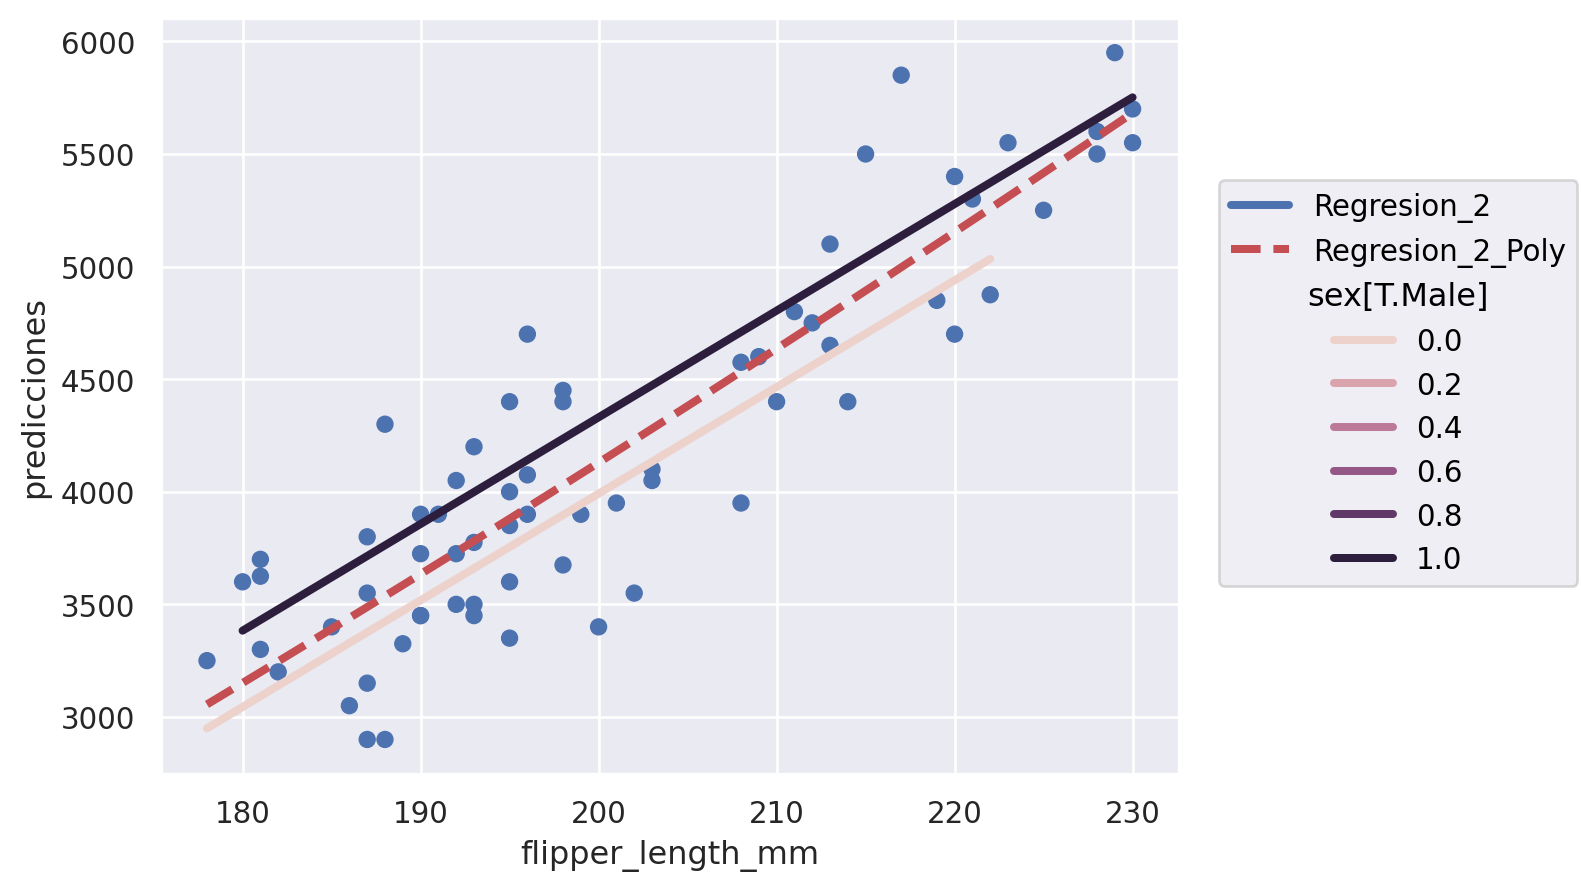

In [136]:
# Grafiquemos la comparacion entre nuestra regresion y la de PolyFit
(
    so.Plot(data=x_test, x='flipper_length_mm', y= "predicciones")
    .add(so.Dot(), y = y_test["body_mass_g"])
    
    .add(so.Line(linewidth=3), label = "Regresion_2", color = "sex[T.Male]")
    .add(so.Line(color='r', linewidth=3, linestyle = "--"), so.PolyFit(2), label = "Regresion_2_Poly")
)

 Nuestro modelo se ve horrible

## f) Dos pingüinos que tienen igual largo de aleta, uno macho y otro hembra, ¿Qué diferencia de peso predice el modelo que tendrán?

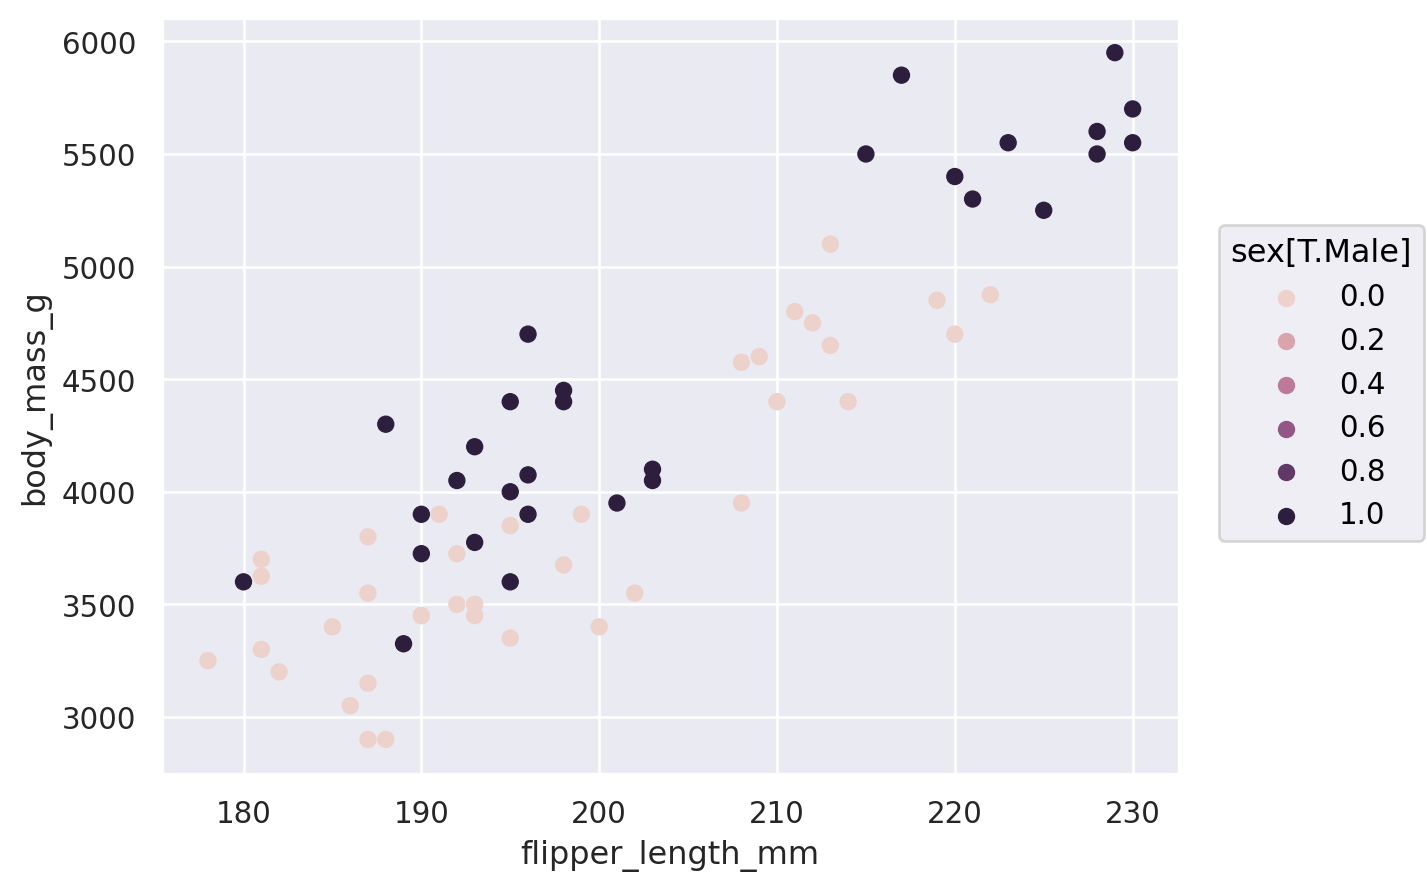

In [84]:
# Grafiquemos la comparacion entre nuestra regresion y la de PolyFit
(
    so.Plot(data=x_test, x='flipper_length_mm', y= y_pred.flatten(), color = "sex[T.Male]")
    .add(so.Dot(), y = y_test["body_mass_g"])
)

Da un grafico bastante feo, pero igualmente se puede observar que si dos pingüinos de diferente sexo tienen igual largo de aleta, generalmente el pingüino macho tiene mayor peso.

# Ej 4

Se quiere predecir el peso de un pinguino usando como variables predictoras el largo de la aleta (flipper_length_mm) y la especie del pinguino (species)

In [85]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


## a) Trabajar con la base de pinguinos sin datos faltantes.

- ¿Cuales son todos los valores que toma la variable "species"?
- ¿Que tipo de variable es?
- ¿Es una variable binaria? 

---

- "species" toma actualmente tres valores

In [86]:
penguins["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

- Es una variable categórica

- No, pero al momento de crear nuestro formulaic va a dividirse en 3 (o 2) variables binarias

## b) Escribir la ecuacion de un modelo lineal para este caso

 ¿Como se codifica la variable especie?

In [87]:
y, X = (
    Formula('body_mass_g ~ flipper_length_mm + species')
    .get_model_matrix(penguins)
)
X.head()

,Intercept,flipper_length_mm,species[T.Chinstrap],species[T.Gentoo]
0,1.0,181.0,0,0
1,1.0,186.0,0,0
2,1.0,195.0,0,0
4,1.0,193.0,0,0
5,1.0,190.0,0,0


- La variable "especie" se codifica con 1 si es de esa especie y 0 si no. 
Como con 2 columnas se puede inferir la 3ra, y para evitarnos dependencias lineales, sólo necesitamos 2 columnas.

- En este caso las 2 columnas son "species[T.Chinstrap]" y "species[T.Gentoo]"

## c) Explicar que diferencia tiene este modelo respecto al propuesto en el Ej 1 

- A diferencia del Ej 1, en este caso tenemos la columna "species", y la vamos a utilizar para predecir mejor nuestros datos.

## d) Codificacion de variables categoricas.

---

Para agregar variables dummies para cada una de las especies usamos OneHotEncoder.

In [100]:
from sklearn.preprocessing import OneHotEncoder

In [99]:
penguins = sns.load_dataset("penguins").dropna()
encoderOHE = OneHotEncoder(sparse = False)
species3 = encoderOHE.fit_transform(penguins[["species"]])
species3_df = pd.DataFrame(species3, columns = encoderOHE.get_feature_names_out(), index = penguins.index)
penguins3 = pd.concat([penguins, species3_df], axis = 1)
penguins3.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0,0.0,0.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0,0.0,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0,0.0,0.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0,0.0,0.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1.0,0.0,0.0


Vemos que ahora tenemos todas nuestras variables anteriores, pero con las "species" transformadas al binario

---

Verifiquemos los tamaños de "species3" y "penguins3"

In [101]:
print(penguins.shape)
print(penguins3.shape)

(333, 7)
(333, 10)


Obtenemos como dije anteriormente, 3 extra variables que son las nuevas variables binarias de "species"

In [102]:
print(penguins["species"].shape)
print(species3.shape)

(333,)
(333, 3)


Lo mismo que arriba

## e) Ajustar el modelo usando todos los datos disponibles.

Reportar los coeficientes encontrados y calcular el error de prediccion.

---

- Para esto vamos a utilizar en nuevo dataset "penguins3"

In [162]:
y, x = Formula("body_mass_g ~ flipper_length_mm + species_Gentoo + bill_length_mm + species_Adelie + bill_depth_mm + island + sex + species_Chinstrap").get_model_matrix(penguins3)
pd.concat([y, x], axis = 1)

,body_mass_g,Intercept,flipper_length_mm,species_Gentoo,bill_length_mm,species_Adelie,bill_depth_mm,island[T.Dream],island[T.Torgersen],sex[T.Male],species_Chinstrap
0,3750.0,1.0,181.0,0.0,39.1,1.0,18.7,0,1,1,0.0
1,3800.0,1.0,186.0,0.0,39.5,1.0,17.4,0,1,0,0.0
2,3250.0,1.0,195.0,0.0,40.3,1.0,18.0,0,1,0,0.0
4,3450.0,1.0,193.0,0.0,36.7,1.0,19.3,0,1,0,0.0
5,3650.0,1.0,190.0,0.0,39.3,1.0,20.6,0,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
338,4925.0,1.0,214.0,1.0,47.2,0.0,13.7,0,0,0,0.0
340,4850.0,1.0,215.0,1.0,46.8,0.0,14.3,0,0,0,0.0
341,5750.0,1.0,222.0,1.0,50.4,0.0,15.7,0,0,1,0.0
342,5200.0,1.0,212.0,1.0,45.2,0.0,14.8,0,0,0,0.0


Uso la matriz de correlacion para ordenar nuestra formula de forma mas eficiente en relacion a "body_mass_g", es decir con sus relaciones mas importantes entre los 1ros Betas. (Ya modificado arriba con los nuevos valores de "x" e "y")


In [163]:
pd.concat([x,y], axis = 1).corr()

,Intercept,flipper_length_mm,species_Gentoo,bill_length_mm,species_Adelie,bill_depth_mm,island[T.Dream],island[T.Torgersen],sex[T.Male],species_Chinstrap,body_mass_g
Intercept,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flipper_length_mm,NaN,1.000000,0.866854,0.653096,-0.685947,-0.577792,-0.425459,-0.273304,0.255169,-0.186175,0.872979
species_Gentoo,NaN,0.866854,1.000000,0.488256,-0.658904,-0.822293,-0.570702,-0.302296,0.012082,-0.377744,0.821178
bill_length_mm,NaN,0.653096,0.488256,1.000000,-0.836409,-0.228626,0.032118,-0.367821,0.344078,0.449098,0.589451
species_Adelie,NaN,-0.685947,-0.658904,-0.836409,1.000000,0.531342,0.013443,0.458786,-0.007961,-0.447597,-0.550479
bill_depth_mm,NaN,-0.577792,-0.822293,-0.228626,0.531342,1.000000,0.457326,0.265173,0.372673,0.323505,-0.472016
island[T.Dream],NaN,-0.425459,-0.570702,0.032118,0.013443,0.457326,1.000000,-0.310248,-0.000673,0.661894,-0.464666
island[T.Torgersen],NaN,-0.273304,-0.302296,-0.367821,0.458786,0.265173,-0.310248,1.000000,-0.012278,-0.205351,-0.251369
sex[T.Male],NaN,0.255169,0.012082,0.344078,-0.007961,0.372673,-0.000673,-0.012278,1.000000,-0.004564,0.424987
species_Chinstrap,NaN,-0.186175,-0.377744,0.449098,-0.447597,0.323505,0.661894,-0.205351,-0.004564,1.000000,-0.298622


In [164]:
x_train, x_test, y_train, y_test,species_train, species_test = train_test_split(x, y, penguins3["species"], test_size = 0.2, random_state = 42)

In [181]:
x_train

,Intercept,flipper_length_mm,species_Gentoo,bill_length_mm,species_Adelie,bill_depth_mm,island[T.Dream],island[T.Torgersen],sex[T.Male],species_Chinstrap
230,1.0,214.0,1.0,40.9,0.0,13.7,0,0,0,0.0
84,1.0,191.0,0.0,37.3,1.0,17.8,1,0,0,0.0
303,1.0,224.0,1.0,50.0,0.0,15.9,0,0,1,0.0
22,1.0,189.0,0.0,35.9,1.0,19.2,0,0,0,0.0
29,1.0,180.0,0.0,40.5,1.0,18.9,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...
194,1.0,196.0,0.0,50.9,0.0,19.1,1,0,1,1.0
77,1.0,184.0,0.0,37.2,1.0,19.4,0,1,1,0.0
112,1.0,193.0,0.0,39.7,1.0,17.7,0,0,0,0.0
277,1.0,220.0,1.0,45.5,0.0,15.0,0,0,1,0.0


In [165]:
# Creamos el entorno de la Regresion Lineal
modelo_total = linear_model.LinearRegression(fit_intercept = False)

# Entrenamos x e y
modelo_total.fit(x_train, y_train)

# Obtenemos (de curiosidad) los beta_0 ... beta_2
modelo_total.coef_

array([[-771.2876809 ,   15.30729934,  523.72766707,   17.14973198,
        -523.38989764,   66.91629434,   12.91746759,  -52.36678272,
         391.0136631 , -771.62545034]])

In [166]:
print("Los Betas encontrados son \n")

print("Beta_0", modelo_total.coef_[0][0])
print("Beta_1", modelo_total.coef_[0][1])
print("Beta_2", modelo_total.coef_[0][2])
print("Beta_3", modelo_total.coef_[0][3])
print("Beta_4", modelo_total.coef_[0][4])
print("Beta_5", modelo_total.coef_[0][5])
print("Beta_6", modelo_total.coef_[0][6])
print("Beta_7", modelo_total.coef_[0][7])
print("Beta_8", modelo_total.coef_[0][8])
print("Beta_9", modelo_total.coef_[0][9])

Los Betas encontrados son 

Beta_0 -771.2876809044598
Beta_1 15.307299337878296
Beta_2 523.7276670749105
Beta_3 17.14973198319295
Beta_4 -523.3898976430563
Beta_5 66.9162943442083
Beta_6 12.91746759151293
Beta_7 -52.36678272316318
Beta_8 391.01366310343843
Beta_9 -771.6254503363126


In [167]:
# Calculamos los nuevos "y"s usando el polinomio de grado 9
y_pred = modelo_total.predict(x_test)

# Calculamos el R^2, es decir comparamos el y_test con el que acabamos de predecir 
r2_total = r2_score(y_test, y_pred)
print('R^2: ', r2_total)

# Calculando el ECM
ecm_total = mean_squared_error(y_test, y_pred)
print('Raiz cuadrada del ECM test: ', np.sqrt(ecm_total), "\n")

# Predicciones en el conjunto de entrenamiento
y_train_pred = modelo_total.predict(x_train)

r2_total_train = r2_score(y_train, y_train_pred)
print('R^2 train: ', r2_total_train)

ecm_total_train = mean_squared_error(y_train, y_train_pred)

print('Raiz cuadrada del ECM train: ', np.sqrt(ecm_total_train))

R^2:  0.8961688345769458
Raiz cuadrada del ECM test:  255.74907911734846 

R^2 train:  0.8695953250846902
Raiz cuadrada del ECM train:  291.2042400932882


## f) <mark>ERROR AL GRAFICAR</mark> Realizar una visualizacion apropiada para ver de los datos junto con las predicciones del modelo

In [177]:
x_test["predicciones"] = y_pred
x_test["species"] = species_test

In [178]:
species_train

230       Gentoo
84        Adelie
303       Gentoo
22        Adelie
29        Adelie
         ...    
194    Chinstrap
77        Adelie
112       Adelie
277       Gentoo
108       Adelie
Name: species, Length: 266, dtype: object

In [179]:
x_test.head()

,Intercept,flipper_length_mm,species_Gentoo,bill_length_mm,species_Adelie,bill_depth_mm,island[T.Dream],island[T.Torgersen],sex[T.Male],species_Chinstrap,predicciones,species
30,1.0,178.0,0.0,39.5,1.0,16.7,1,0,0,0.0,3237.855700,Adelie
317,1.0,222.0,1.0,46.9,0.0,14.6,0,0,0,0.0,4931.960767,Gentoo
79,1.0,195.0,0.0,42.1,1.0,19.1,0,1,1,0.0,4028.997611,Adelie
201,1.0,198.0,0.0,49.8,0.0,17.3,1,0,0,1.0,3512.558150,Chinstrap
63,1.0,192.0,0.0,41.1,1.0,18.2,0,0,1,0.0,3958.068099,Adelie


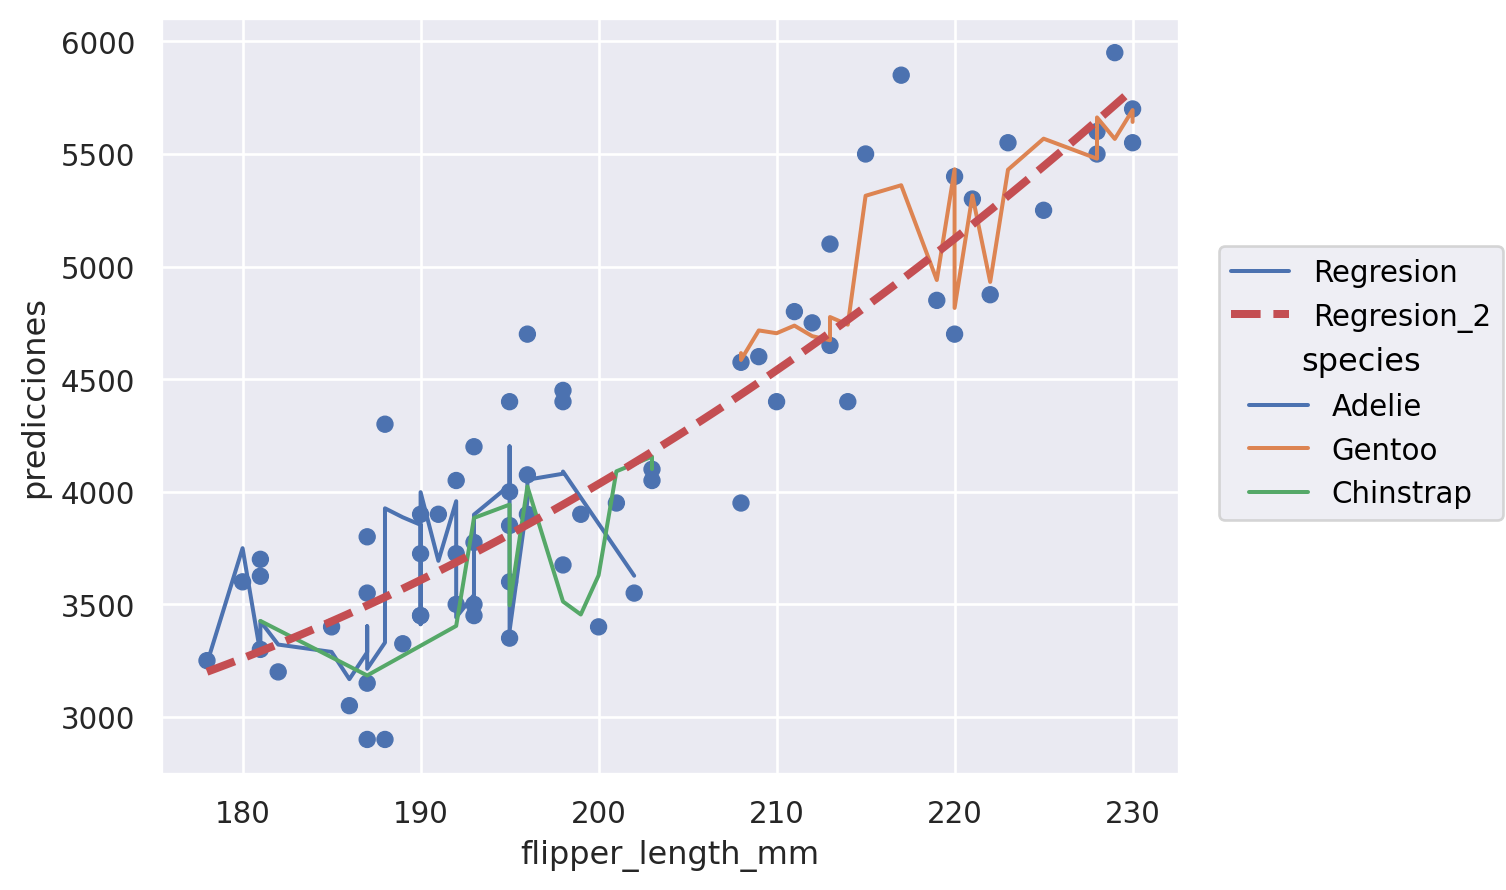

In [185]:
# Grafiquemos la comparacion entre nuestra regresion y la de PolyFit
(
    so.Plot(data=x_test, x='flipper_length_mm', y= "predicciones")
    .add(so.Dot(), y = y_test["body_mass_g"])
    
    .add(so.Line(), label = "Regresion", color = "species")
    .add(so.Line(color='r', linewidth=3, linestyle = "--"), so.PolyFit(2), label = "Regresion_2")
)

## Ej 5

Comparar 3 modelos lineales para predecir el precio de un inmueble 

- Modelo 1:  precio ~ superficie 
- Modelo 2:  precio ~ superficie + zona 
- Modelo 3: modelo propuesto por mi

In [188]:
inmuebles = pd.read_csv("inmuebles.csv")

In [189]:
inmuebles.head()

,superficie,precio,zona
0,110.0,454.425690,Zona 2
1,109.0,383.004114,Zona 2
2,101.0,437.362638,Zona 2
3,58.0,304.392486,Zona 3
4,129.0,620.027722,Zona 3


### a) Nivel 1

Entrenemos el modelo 1

In [193]:
y, x = Formula("precio ~ superficie").get_model_matrix(inmuebles)
pd.concat([y, x], axis = 1)

,precio,Intercept,superficie
0,454.425690,1.0,110.0
1,383.004114,1.0,109.0
2,437.362638,1.0,101.0
3,304.392486,1.0,58.0
4,620.027722,1.0,129.0
...,...,...,...
164,525.953698,1.0,116.0
165,582.190837,1.0,118.0
166,200.256009,1.0,52.0
167,151.569142,1.0,37.0


In [207]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [208]:
# Creamos el entorno de la Regresion Lineal
modelo_inmuebles = linear_model.LinearRegression(fit_intercept = False)

# Entrenamos x e y
modelo_inmuebles.fit(x_train, y_train)

# Obtenemos (de curiosidad) los beta_0 ... beta_2
modelo_inmuebles.coef_

array([[-49.33503504,   4.70567868]])

In [209]:
print("Los Betas encontrados son \n")

print("Beta_0", modelo_inmuebles.coef_[0][0])
print("Beta_1", modelo_inmuebles.coef_[0][1])

Los Betas encontrados son 

Beta_0 -49.3350350390884
Beta_1 4.705678677107959


In [214]:
# Calculamos los nuevos "y"s usando el polinomio de grado 9
y_pred = modelo_inmuebles.predict(x_test)

# Calculamos el R^2, es decir comparamos el y_test con el que acabamos de predecir 
r2_inmuebles = r2_score(y_test, y_pred)
print('R^2: ', r2_inmuebles)

# Calculando el ECM
ecm_inmuebles = mean_squared_error(y_test, y_pred)
print('Raiz cuadrada del ECM test: ', np.sqrt(ecm_inmuebles), "\n")

# Predicciones en el conjunto de entrenamiento
y_train_pred = modelo_inmuebles.predict(x_train)

r2_total_train = r2_score(y_train, y_train_pred)
print('R^2 train: ', r2_total_train)

ecm_total_train = mean_squared_error(y_train, y_train_pred)

print('Raiz cuadrada del ECM train: ', np.sqrt(ecm_total_train))

R^2:  0.8432462515821447
Raiz cuadrada del ECM test:  57.02533063146195 

R^2 train:  0.8812371897319107
Raiz cuadrada del ECM train:  50.21658101180653


In [218]:
y_test.head()

,precio
138,150.079901
30,255.341939
119,303.633414
29,223.288913
143,434.383700


In [224]:
x_test["predicciones"] = y_test
x_test["zona"] = 
x_test.head()

,Intercept,superficie,predicciones
138,1.0,46.0,150.079901
30,1.0,80.0,255.341939
119,1.0,85.0,303.633414
29,1.0,66.0,223.288913
143,1.0,97.0,434.383700


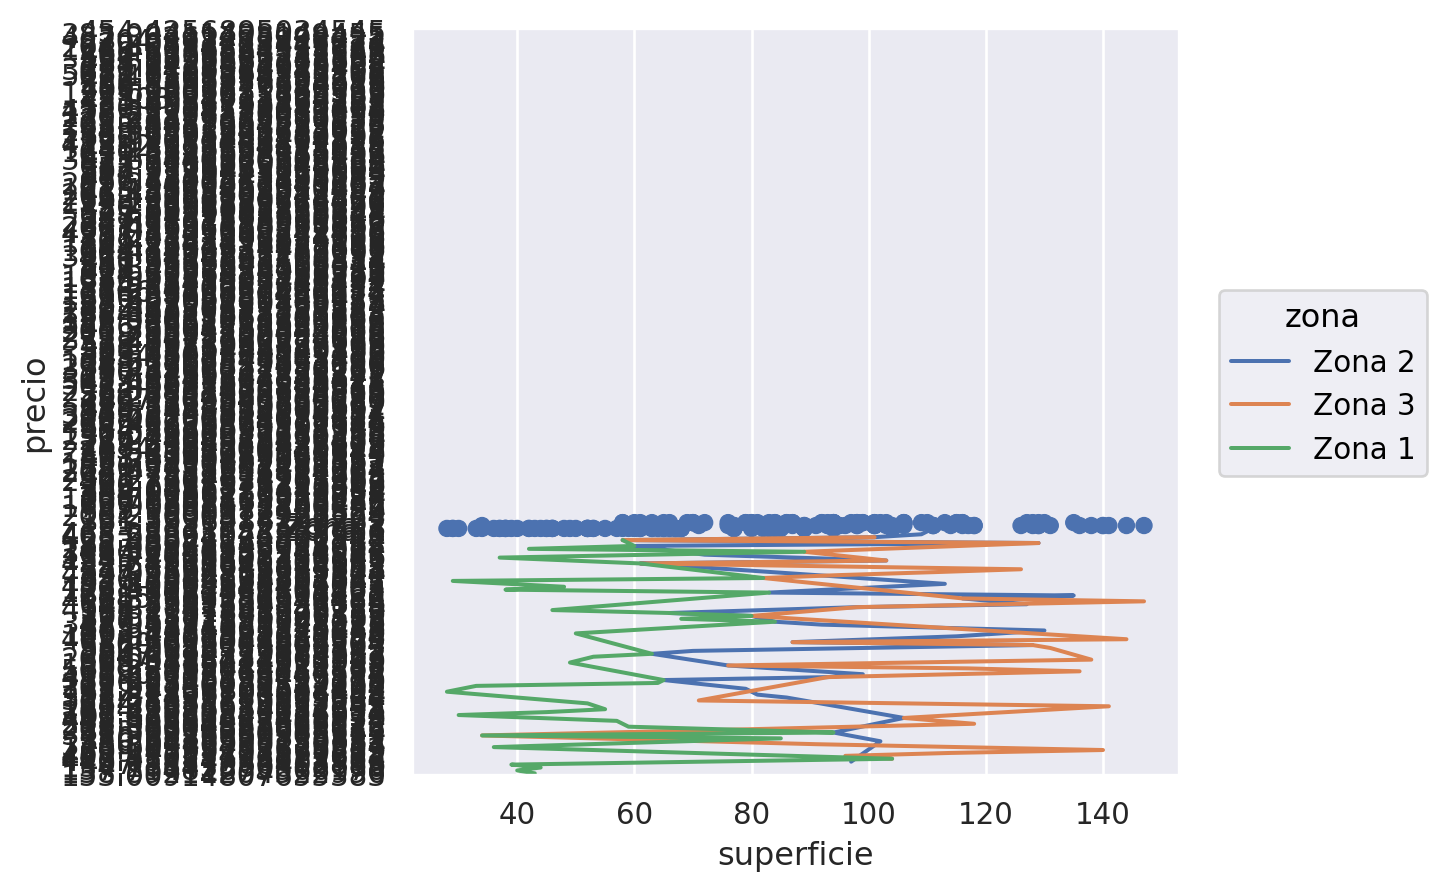

In [226]:
(
    so.Plot(data=inmuebles, x='superficie', y= "precio")
    .add(so.Dot(), y = "zona")
    .add(so.Line(), y = modelo_inmuebles.predict(x).flatten(), color = "zona")
)